Ноздрова В. ИУ5-81Б

# Задание 1

In [ ]:
Variant<-15
set.seed(Variant)
K<-sample(c(3:6),1)
M<-sample(c(1:3),1)
N<-sample(c(1:3),1)
lambda<-runif(1)
mu<-runif(1)
nu<-runif(1)
p<-runif(1)
m1<-sample(c(1:2),1)
m2<-sample(c(1:2),1)
View(data.frame(K,M,N,lambda,mu,nu,p,m1,m2))

K,M,N,lambda,mu,nu,p,m1,m2
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
3,3,2,0.6509055,0.3670719,0.9888592,0.8151934,1,1


Граф состояний:

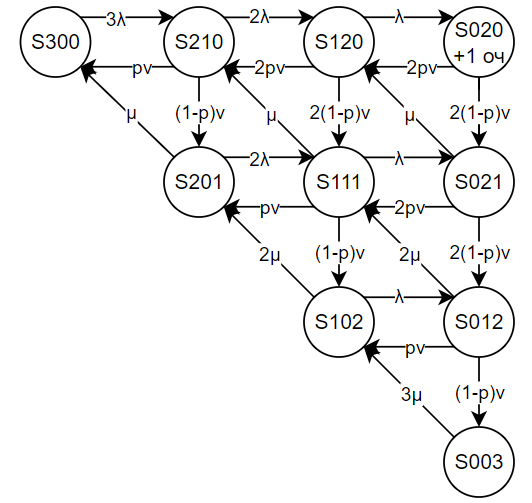

Первая цифра - количество программистов, пишущих программы

Вторая цифра - количество программ, проверяющихся на вирусы

Третья цифра - количество программ, выполняющихся на сервере

В состоянии S020 одна программа находится в очереди на проверку

Составим уравнения Колмогорова:

$\begin{cases}
\frac{dP_{300}(t)}{dt}=μP_{201}(t)+pνP_{210}(t)-3λP_{300}(t)\\
\frac{dP_{210}(t)}{dt}=3λP_{300}(t)+μP_{111}(t)+2pνP_{120}(t)-(2λ+ν)P_{210}(t)\\
\frac{dP_{120}(t)}{dt}=2λP_{210}(t)+μP_{021}(t)+2pνP_{020}(t)-(λ+2ν)P_{120}(t)\\
\frac{dP_{020}(t)}{dt}=λP_{120}(t)-2νP_{020}(t)\\
\\
\frac{dP_{201}(t)}{dt}=(1-p)νP_{210}(t)+2μP_{102}(t)+pνP_{111}(t)-(μ+2λ)P_{201}(t)\\
\frac{dP_{111}(t)}{dt}=2(1-p)νP_{120}(t)+2λP_{201}(t)+2μP_{012}(t)+2pνP_{021}(t)-(μ+λ+ν)P_{111}\\
\frac{dP_{021}(t)}{dt}=3(1-p)νP_{020}(t)+λP_{111}(t)-(μ+2ν)P_{021}(t)\\
\\
\frac{dP_{102}(t)}{dt}=(1-p)νP_{111}(t)+3μP_{003}(t)+pνP_{012}(t) - (2μ+λ)P_{102}(t)\\
\frac{dP_{012}(t)}{dt}=2(1-p)νP_{021}(t)+λP_{102}(t)-(2μ+ν)P_{012}(t)\\
\\
\frac{dP_{003}(t)}{dt}=(1-p)νP_{012}(t)-3μP_{003}(t)\\
\end{cases}$

Для финальных вероятностей:

$\begin{cases}
μP_{201}+pνP_{210}-3λP_{300}=0\\
3λP_{300}+μP_{111}+2pνP_{120}-(2λ+ν)P_{210}=0\\
2λP_{210}+μP_{021}+2pνP_{020}-(λ+2ν)P_{120}=0\\λP_{120}-2νP_{020}=0\\
\\
(1-p)νP_{210}+2μP_{102}+pνP_{111}-(μ+2λ)P_{201}=0\\
2(1-p)νP_{120}+2λP_{201}+2μP_{012}+2pνP_{021}-(μ+λ+ν)P_{111}=0\\
2(1-p)νP_{020}+λP_{111}-(μ+2ν)P_{021}=0\\
\\
(1-p)νP_{111}+3μP_{003}+pνP_{012}-(2μ+λ)P_{102}=0\\
2(1-p)νP_{021}+λP_{102}-(2μ+ν)P_{012}=0\\
\\
(1-p)νP_{012}-3μP_{003}=0\\
\end{cases}$

Уравнение нормировки:

$P_{300}+P_{210}+P_{120}+P_{020}+P_{201}+P_{111}+P_{021}+P_{102}+P_{012}+P_{003}=1$

In [ ]:
l <- lambda
m <- mu
n <- nu

In [ ]:
#              P300      P210         P120       P020       P201       P111         P021       P102      P012    P003
X <- matrix(c( -3*l,      p*n,           0,         0,         m,         0,           0,         0,        0,      0,        #dP300/dt
                3*l, -(2*l+n),       2*p*n,         0,         0,         m,           0,         0,        0,      0,        #dP210/dt
                  0,      2*l,    -(l+2*n),     2*p*n,         0,         0,           m,         0,        0,      0,        #dP120/dt
                  0,        0,           l,      -2*n,         0,         0,           0,         0,        0,      0,        #dP020/dt

                  0,  (1-p)*n,           0,         0,  -(m+2*l),       p*n,           0,       2*m,        0,      0,        #dP201/dt
                  0,        0,   2*(1-p)*n,         0,       2*l,  -(m+l+n),       2*p*n,         0,      2*m,      0,        #dP111/dt
                  0,        0,           0, 2*(1-p)*n,         0,         l,    -(m+2*n),         0,        0,      0,        #dP021/dt

                  0,        0,           0,         0,         0,   (1-p)*n,           0,  -(2*m+l),      p*n,    3*m,        #dP102/dt
                  0,        0,           0,         0,         0,         0,   2*(1-p)*n,         l, -(2*m+n),      0,        #dP012/dt

                  1,        1,           1,         1,         1,         1,           1,         1,        1,      1),       #dP003/dt
10, 10, byrow=TRUE)
y <- c(0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
Res <- solve(X, y)

In [ ]:
P <- matrix(c(Res[1:4],0,Res[5:7],0,0,Res[8:9],0,0,0,Res[10]),4,4, byrow=T); P

0.1276728,0.2521177,0.1659536,0.036412375
0.0000000,0.1255174,0.1652409,0.054383987
0.0000000,0.0000000,0.0411328,0.027075209
0.0000000,0.0000000,0.0000000,0.004493154


In [ ]:
Lk_sist <- sum(P[,2])+2*sum(P[,3])+3*sum(P[,4])
print(cat(paste("L_sist:", Lk_sist)))

Lk_abs <- (sum(P[2,])+2*sum(P[3,])+3*sum(P[4,]))*mu
print(cat(paste("L_abs:", Lk_abs)))

Tk_sist <- Lk_sist/((K-Lk_sist)*lambda)
print(cat(paste("T_sist:", Tk_sist)))

L_sist: 1.48938394963498NULL
L_abs: 0.181714466152718NULL
T_sist: 1.51472786152998NULL


Метод агрегирования с использованием параметров связи

В первой модели совокупность серверов и компьютеров по проверке наличия вирусов заменим только одним обобщенный параметром - интенсивностью обслуживания $\mu_{общ}$
Тогда модель будет обычной моделью рождения гибели для замкнутой системы:

$P_0=\left(1+\frac{K\lambda}{\mu_{\text{общ}}}+\frac{K(K-1)\lambda^2}{\mu_{\text{общ}}^2}+\ldots+\frac{K!\lambda^K}{\mu_{\text{общ}}^K}\right)^{-1}$

$P_1=P_0\frac{K\lambda}{\mu_{\text{общ}}}$

$P_2=P_0\frac{K(K-1)\lambda^2}{\mu_{\text{общ}}^2}$

$\ldots$

$L_{\text{сист}}=\sum_{k=1}^K k\cdot P_k$

$T_{\text{сист}}=\frac{L_{\text{сист}}}{\lambda(K-L_{\text{сист}})}$



In [ ]:
m_ob <- 0.18
L <- function(m_ob) {
P0 <- 1/(1+3*lambda/m_ob + 2*6*lambda^2/m_ob^2)
P1 <- P0*3*lambda/m_ob
P2 <- P0*6*lambda^2/m_ob^2
P3 <- P0*6*lambda^2/m_ob^2
return(P1+2*P2+3*P3)}

L(m_ob)

[1] 2.388765

$⌈L_{сист}⌉ = 3$

Во второй модели будем считать, что в системе постоянно циркулируют $L_{\text{сист}}$ заявок. В качестве состояний системы возьмем количество заявок, обрабатываемых на основных серверах. Тогда:

$\nu_n=(1-p)\nu\cdot \min{(N,L_{\text{сист}}-n)}, n=0,\ldots,L_{\text{сист}}-1$

$\mu_n=\mu\cdot \min{(M, n)}, n=1,2, \ldots,L_{\text{сист}}$

Финальные вероятности:

$\pi_0=\left(1+\frac{\nu_0}{\mu_1}+\frac{\nu_0\nu_1}{\mu_1\mu_2}+\ldots\right)^{-1}$

$\pi_1=\pi_0\cdot \frac{\nu_0}{\mu_1}$

$\pi_2=\pi_0\cdot \frac{\nu_0\nu_1}{\mu_1\mu_2}$

$\ldots$

Тогда:

$\mu_{\text{общ}}=\sum_{n=1}^{L_{\text{сист}}}\pi_n\cdot \mu_n$

In [ ]:
mob <- function(L)
{
pe <- rep(c(0),L+1)
v <- rep(c(0),L)
mn <- rep(c(0),L)
pe[1] <- 1
tmp <- 1
for (i in 1:L)
{
  v[i] <- (1-p)*nu*min(i,L+1)
  mn[i] <- mu*min(i,3)
  tmp <- tmp*v[i]/mn[i]
  pe[1] <- pe[1]+tmp
}
pe[1] <- 1/pe[1]
for (i in (2:(L+1))){
  pe[i]<-pe[1]*prod(v[1:i-1])/prod(mn[1:i-1])
}
return(sum(pe[2:length(pe)]*mn))
}

mob(3)

[1] 0.2678267

In [ ]:
ls <- L(mob(3)); ls
ceiling(ls)

[1] 2.330281

[1] 3

Таким образом, получаем следующие характеристики:

In [ ]:
La_sist <- L(mob(3))
print(cat(paste("L_sist:", La_sist)))

La_abs <- mob(3)
print(cat(paste("L_abs:", La_abs)))

Ta_sist <- La_sist/((K-La_sist)*lambda)
print(cat(paste("T_sist:", Ta_sist)))

L_sist: 2.33028057953017NULL
L_abs: 0.267826696218613NULL
T_sist: 5.34561112669346NULL


In [ ]:
install.packages("simmer")
library(simmer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘BH’




In [ ]:
SIM_TIME = 300000

prog <- trajectory("failures") %>%
   timeout(function() rexp(1, lambda)) %>%
   seize("checker",1)%>%
   timeout(function() rexp(1, nu)) %>%
   release("checker")%>%
   branch(function() sample(c(0,1), prob=c(p,1-p),1),T,
          trajectory()%>%
          seize("server",1)%>%
          timeout(function() rexp(1, mu)) %>%
          release("server")%>%
          set_global("done",1,"+"))%>%
   rollback(9, Inf)

syst <- simmer("system") %>%
   add_resource("checker", capacity=N, queue_size=m1, mon=TRUE) %>%
   add_resource("server", capacity=M, queue_size=m2, mon=TRUE) %>%
   add_generator(paste0("program", c(1:K)," "), prog, at(rep(0,K))) %>%
   add_global("done",0)


syst %>% run(until = SIM_TIME) %>% invisible

In [ ]:
prog_stats <- get_mon_arrivals(syst, per_resource = T)
syst_stats <- get_mon_resources(syst)

Le_sist <- mean(syst_stats[syst_stats$system!=0,]$system)
print(cat(paste0("L_sist: ",Le_sist)))

Le_abs <- get_global(syst,"done")/SIM_TIME
print(cat(paste0("L_abs: ", Le_abs)))

Te_sist <- mean(prog_stats$end_time-prog_stats$start_time)
print(cat(paste0("T_sist: ",Te_sist)))

L_sist: 1.46788301913676NULL
L_abs: 0.17798NULL
T_sist: 1.32968604693855NULL


In [ ]:
param <- c("L_sist", "L_abs","T_sist")
kolmog <- c(Lk_sist, Lk_abs, Tk_sist)
agregir <- c(La_sist, La_abs, Ta_sist)
experim <- c(Le_sist, Le_abs, Te_sist)
ans <- data.frame(param, kolmog, agregir, experim)
View(ans)

param,kolmog,agregir,experim
<chr>,<dbl>,<dbl>,<dbl>
L_sist,1.4893839,2.3302806,1.467883
L_abs,0.1817145,0.2678267,0.177980
T_sist,1.5147279,5.3456111,1.329686
